In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
day = pd.read_csv('day.csv')

In [3]:
# Also dropping unnecessary columns

# date and instant are not required as they are just counts and do not affect the target variable

# casual and registered can also be dropped as we are trying to model cnt and cnt=casual + registered. So these two variables
# are already accounted in cnt

# temp can be dropped as it is higly correlated with atemp. Users are affected by perceived temp and so only atemp can be retained


day.drop(['instant'], axis = 1, inplace = True)
day.drop(['dteday'], axis = 1, inplace = True)
day.drop(['casual'], axis = 1, inplace = True)
day.drop(['registered'], axis = 1, inplace = True)
day.drop(['temp'], axis = 1, inplace = True)

day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


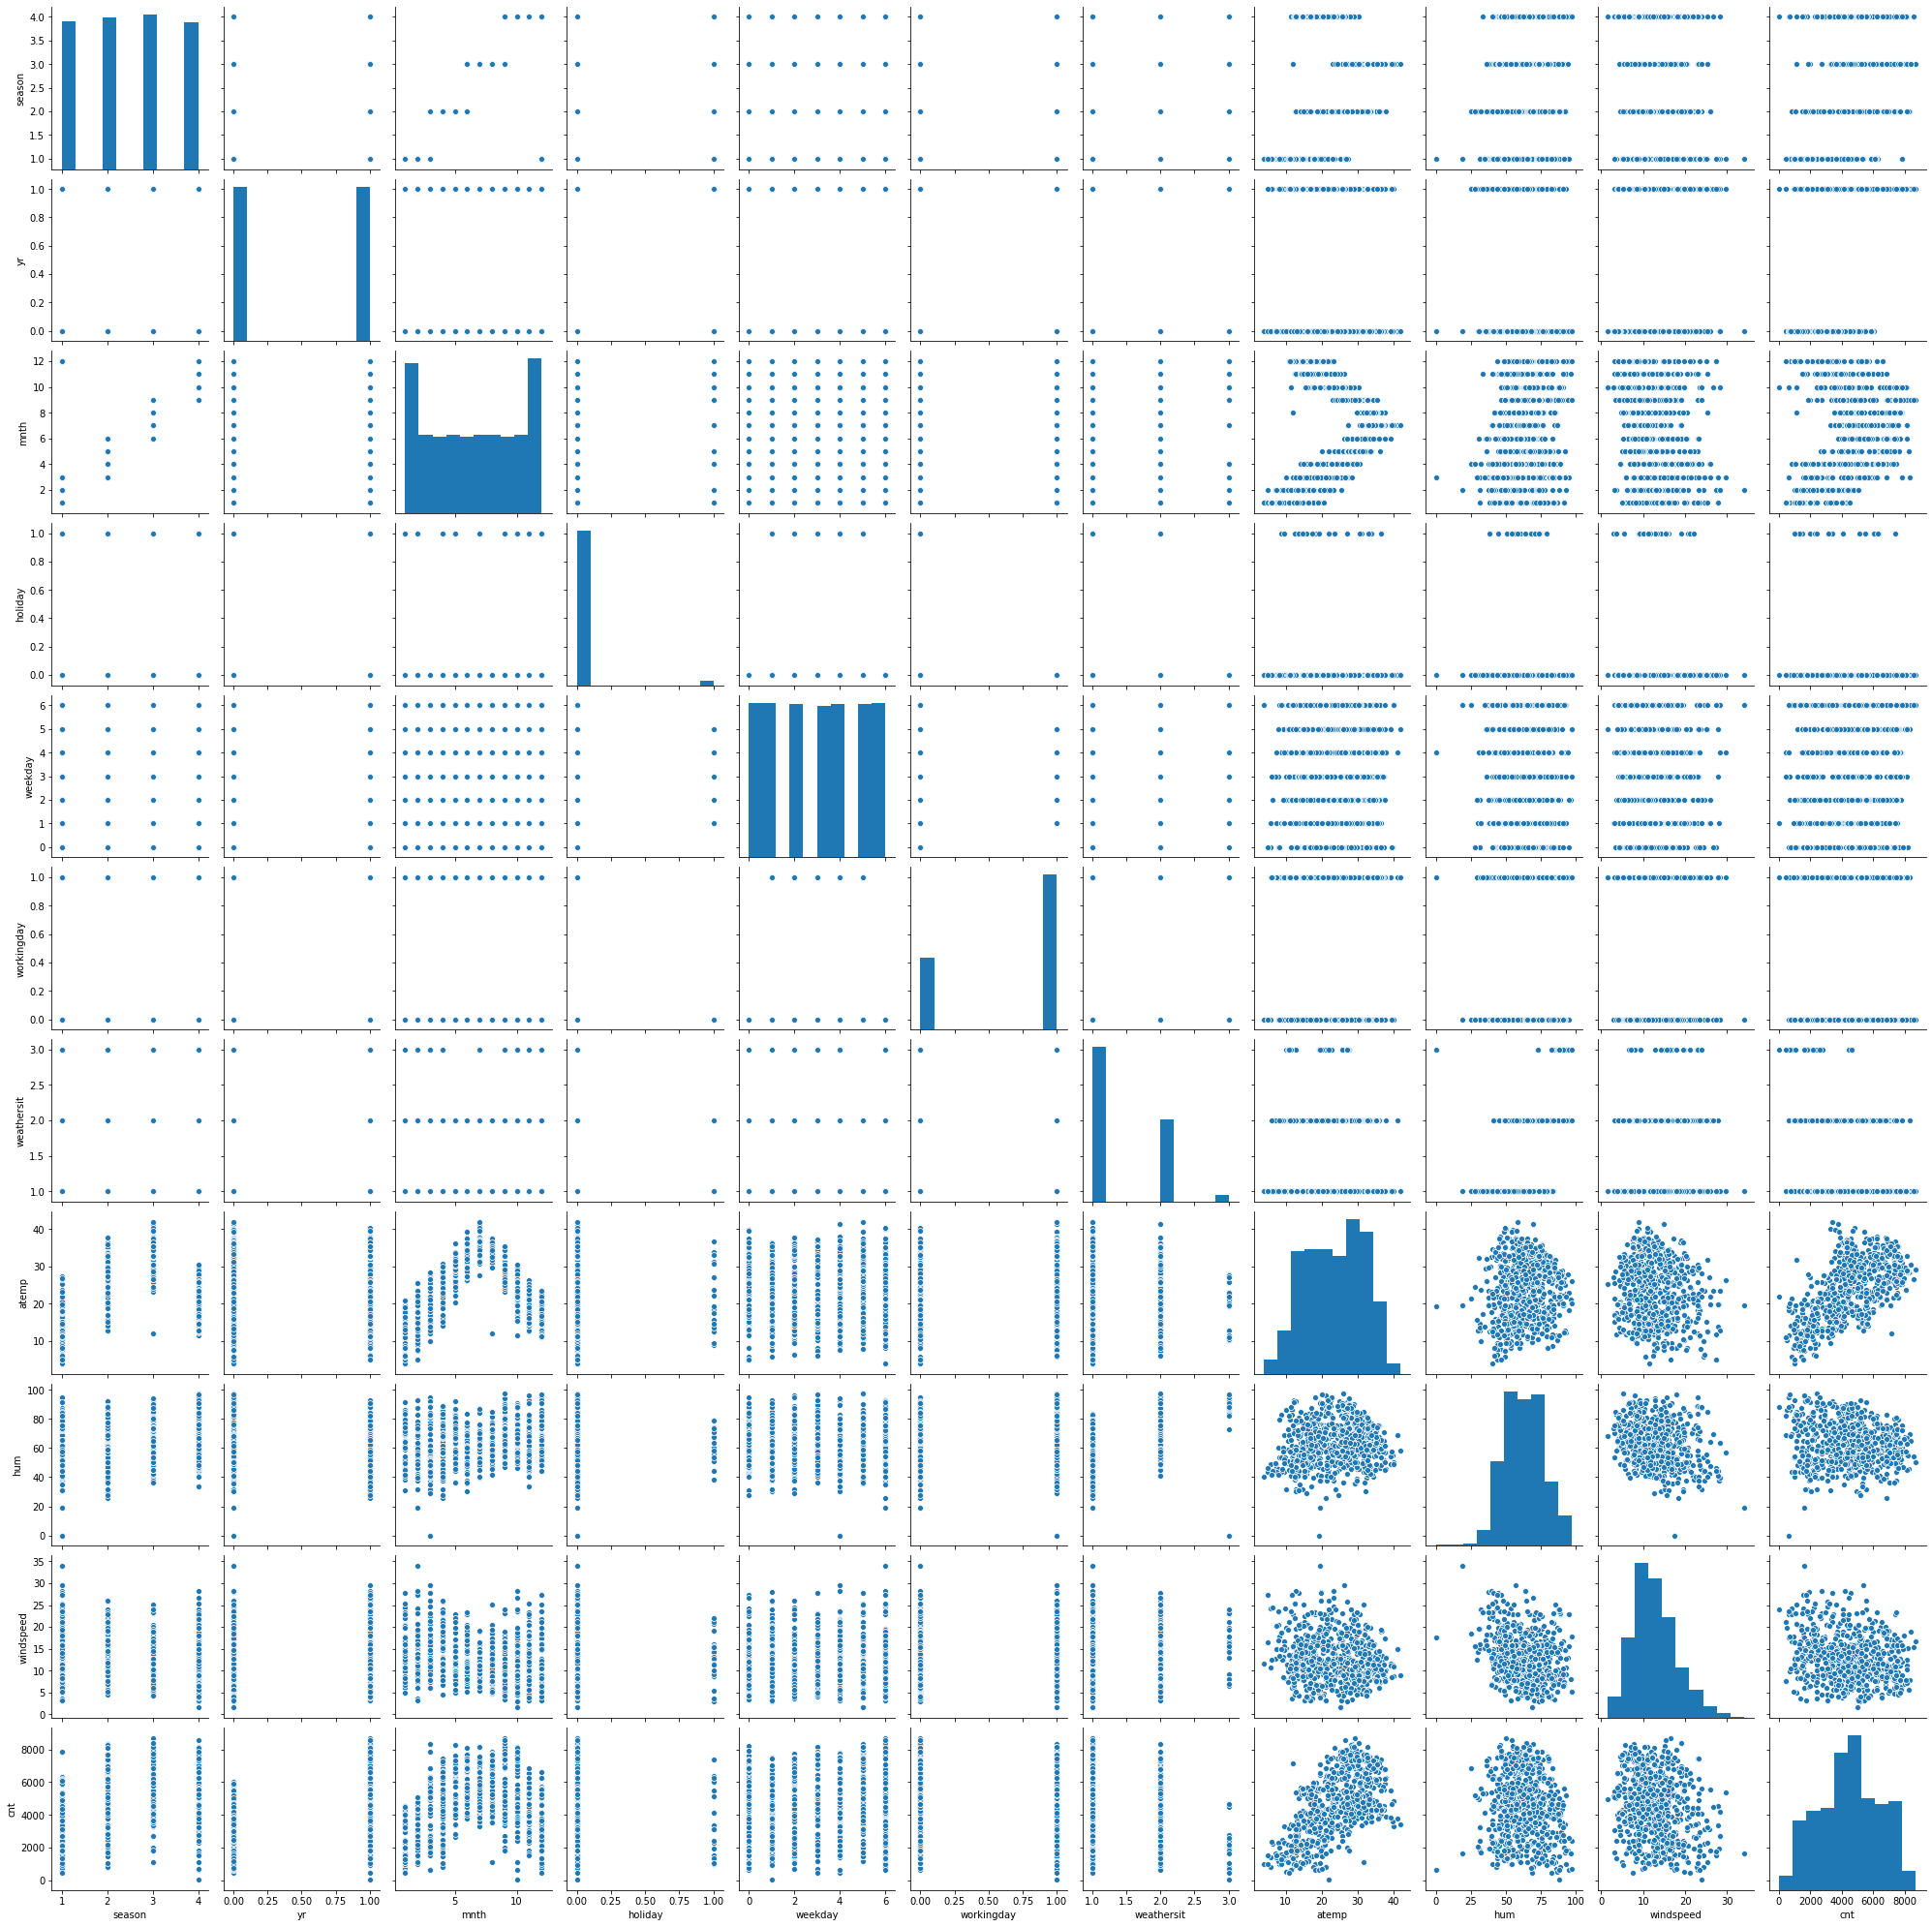

In [4]:
#Visualise numeric variables
sns.pairplot(day)

In [5]:
plt.show()

In [6]:
#Create dummy variables for weekdays and dropping redundant column

status = pd.get_dummies(day['weekday'], prefix='weekday', prefix_sep='_', drop_first=True)
status.head()

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [7]:
#concat dummy with main dataset
day = pd.concat([day, status], axis = 1)

In [8]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,0,0,0,0,0,1
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0,0,0,0
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0


In [9]:
day.drop(['weekday'], axis = 1, inplace = True)

day.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,0,0,2,18.18125,80.5833,10.749882,985,0,0,0,0,0,1
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,801,0,0,0,0,0,0
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,1,0,1,0,1,1,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0
4,1,0,1,0,1,1,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0


In [10]:
#Create dummy variables for weather and dropping redundant column


weather= pd.get_dummies(day['weathersit'], drop_first=True)
weather.head() 
weather = weather.rename(columns={2:"Mist",3:"Light_snow_rain"})
day= pd.concat([day, weather],axis=1)
day= day.drop("weathersit", axis=1)
day.head()


,season,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Mist,Light_snow_rain
0,1,0,1,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,1,1,0
1,1,0,1,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,1,0
2,1,0,1,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0
3,1,0,1,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0
4,1,0,1,0,1,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0


In [11]:
#Create dummy variables for season and dropping redundant column


season= pd.get_dummies(day["season"],drop_first=True)
season= season.rename(columns={2:"summer",3:"fall",4:"winter"})
day= pd.concat([day,season],axis=1)
day= day.drop("season", axis=1)
day.head()


,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Mist,Light_snow_rain,summer,fall,winter
0,0,1,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,1,1,0,0,0,0
1,0,1,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,1,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,0


In [12]:
#Create dummy variables for month and dropping redundant column


month= pd.get_dummies(day["mnth"],drop_first=True)
month= month.rename(columns={2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
day= pd.concat([day,month],axis=1)
day= day.drop("mnth", axis=1)
day.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Splitting into train and test

In [14]:
import sklearn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_train, df_test= train_test_split(day, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [17]:
### Rescaling the Features 

#We will use MinMax scaling.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
# Create a list of numeric variables

In [20]:
num_var= ["atemp","cnt","hum","windspeed"]

In [21]:
df_train[num_var]= scaler.fit_transform(df_train[num_var])
df_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
#Training the model

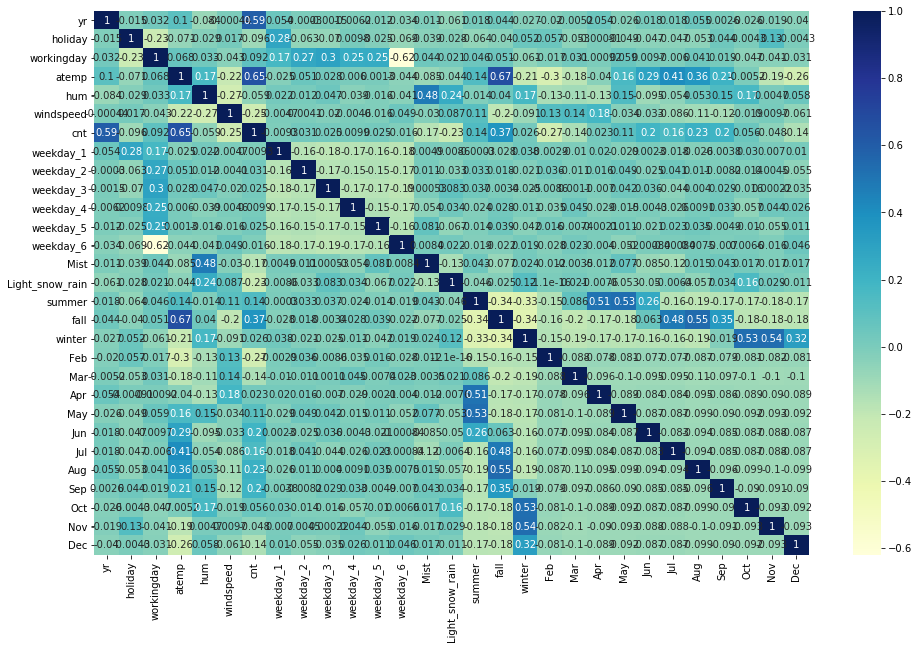

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# Creating X_train and y_train from the dataframe

y_train= df_train.pop("cnt")
X_train = df_train


In [29]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,weekday_1,weekday_2,weekday_3,weekday_4,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
576,1,0,1,0.766351,0.725633,0.264686,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [32]:
#Buid the model using RFE

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#Chosing number of features as 22 to start with

In [36]:
rfe = RFE(lm,15)
rfe= rfe.fit(X_train, y_train)


In [37]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 4),
 ('Mist', False, 3),
 ('Light_snow_rain', True, 1),
 ('summer', True, 1),
 ('fall', False, 5),
 ('winter', True, 1),
 ('Feb', False, 12),
 ('Mar', False, 8),
 ('Apr', False, 10),
 ('May', False, 7),
 ('Jun', False, 9),
 ('Jul', False, 11),
 ('Aug', False, 2),
 ('Sep', True, 1),
 ('Oct', False, 6),
 ('Nov', False, 13),
 ('Dec', False, 14)]

In [38]:
#Dropping features based on what RFE says is not useful (False flag)

In [39]:
col= X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'Light_snow_rain',
       'summer', 'winter', 'Sep'],
      dtype='object')

In [42]:
# 15 features are True. Building model using Statsmodel for detailed statistics

In [41]:
X_train_rfe = X_train[col]

In [44]:
import statsmodels.api as sm

In [45]:
X_train_sm= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 18 May 2022   Prob (F-statistic):          7.76e-177
Time:                        19:00:24   Log-Likelihood:                 482.89
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     495   BIC:                            -872.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2535      0.028     

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif= pd.DataFrame()
X = X_train_rfe
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
6,weekday_1,inf
7,weekday_2,inf
8,weekday_3,inf
9,weekday_4,inf
10,weekday_5,inf
4,hum,11.20
3,atemp,7.40
5,windspeed,3.58


In [51]:
# Dropping weekdays1-5 due to high p-value

In [54]:
X_train_rfe= X_train_rfe.drop("weekday_1", axis=1)


,yr,holiday,workingday,atemp,hum,windspeed,weekday_2,weekday_3,weekday_4,weekday_5,Light_snow_rain,summer,winter,Sep
576,1,0,1,0.766351,0.725633,0.264686,1,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,0,1,0,0
111,0,0,1,0.318819,0.751824,0.380981,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.824359,0.679690,0.187140,0,0,1,0,0,0,0,0
53,0,0,1,0.218747,0.435939,0.111379,0,1,0,0,0,0,0,0
350,0,0,0,0.223544,0.577930,0.431816,0,0,0,0,0,0,1,0
79,0,0,1,0.434043,0.759870,0.529881,0,0,0,0,0,1,0,0


In [55]:
X_train_rfe=X_train_rfe.drop("weekday_2", axis=1)
X_train_rfe=X_train_rfe.drop("weekday_3", axis=1)
X_train_rfe=X_train_rfe.drop("weekday_4", axis=1)
X_train_rfe=X_train_rfe.drop("weekday_5", axis=1)
X_train_rfe

,yr,holiday,workingday,atemp,hum,windspeed,Light_snow_rain,summer,winter,Sep
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.824359,0.679690,0.187140,0,0,0,0
53,0,0,1,0.218747,0.435939,0.111379,0,0,0,0
350,0,0,0,0.223544,0.577930,0.431816,0,0,1,0
79,0,0,1,0.434043,0.759870,0.529881,0,1,0,0


In [57]:
X_train_sm= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 18 May 2022   Prob (F-statistic):          6.35e-181
Time:                        19:15:14   Log-Likelihood:                 481.53
No. Observations:                 510   AIC:                            -941.1
Df Residuals:                     499   BIC:                            -894.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2552      0.027     

In [58]:
vif= pd.DataFrame()
X = X_train_rfe
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
4,hum,11.18
3,atemp,7.39
5,windspeed,3.58
2,workingday,3.13
0,yr,2.02
8,winter,1.62
7,summer,1.59
9,Sep,1.20
6,Light_snow_rain,1.09
1,holiday,1.08


In [59]:
# Dropping hum due to high VIF

In [60]:
X_train_rfe=X_train_rfe.drop("hum", axis=1)
X_train_rfe

,yr,holiday,workingday,atemp,windspeed,Light_snow_rain,summer,winter,Sep
576,1,0,1,0.766351,0.264686,0,0,0,0
426,1,0,0,0.438975,0.255342,0,0,0,0
728,1,0,0,0.200348,0.663106,0,0,0,0
482,1,0,0,0.391735,0.188475,0,1,0,0
111,0,0,1,0.318819,0.380981,0,1,0,0
...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.824359,0.187140,0,0,0,0
53,0,0,1,0.218747,0.111379,0,0,0,0
350,0,0,0,0.223544,0.431816,0,0,1,0
79,0,0,1,0.434043,0.529881,0,1,0,0


In [61]:
X_train_sm= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 18 May 2022   Prob (F-statistic):          8.84e-167
Time:                        19:17:26   Log-Likelihood:                 445.33
No. Observations:                 510   AIC:                            -870.7
Df Residuals:                     500   BIC:                            -828.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0736      0.019     

In [62]:
# R2 has reduced. Don't know how to add hum back

In [63]:
# Dropping workingday due to high p-value

In [64]:
X_train_rfe=X_train_rfe.drop("workingday", axis=1)

In [65]:
X_train_sm= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     244.4
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.48e-167
Time:                        19:19:34   Log-Likelihood:                 444.31
No. Observations:                 510   AIC:                            -870.6
Df Residuals:                     501   BIC:                            -832.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0833      0.018     

In [66]:
vif= pd.DataFrame()
X = X_train_rfe
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,atemp,3.64
3,windspeed,2.93
0,yr,2.00
5,summer,1.57
6,winter,1.35
7,Sep,1.20
4,Light_snow_rain,1.06
1,holiday,1.03


In [67]:
# Acceptable P-values and VIF. Hence model building complete

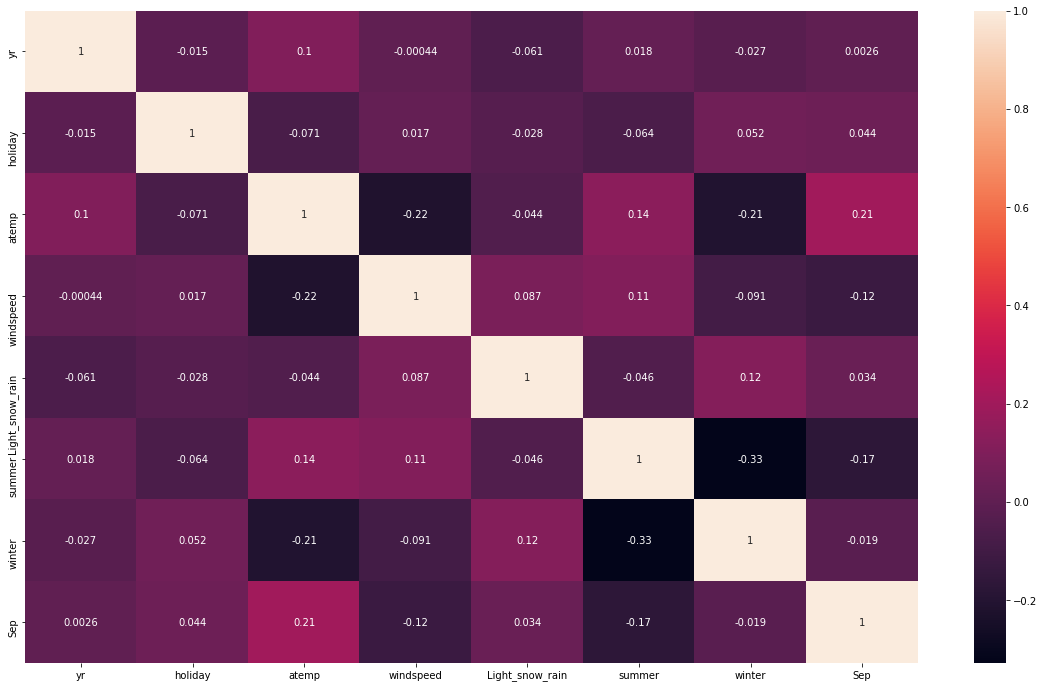

In [69]:
# Plotting correlation between remaining terms

plt.figure(figsize=(20,12))
sns.heatmap(X_train_rfe.corr(), annot=True)


In [70]:
#Low correation between the features

In [73]:
## Residual Analysis of the train data

#So, now to check if the error terms are also normally distributed (which is infact, one of 
#the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [75]:
y_train_pred = lm.predict(X_train_sm)


Text(0.5, 0, 'Errors')

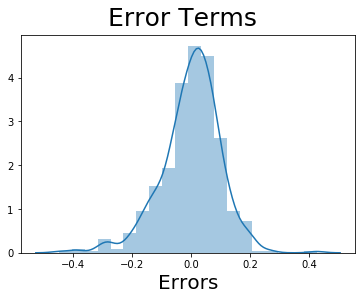

In [76]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 25)                 
plt.xlabel('Errors', fontsize = 20)  


In [81]:
## Making Predictions
#Applying the scaling on the test sets

In [78]:
### Rescaling the Features 

#We will use MinMax scaling.

In [79]:
num_var= ["atemp","cnt","hum","windspeed"]
df_test[num_var]= scaler.transform(df_test[num_var])
df_test.head(10)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
184,0,1,0,0.769660,0.657364,0.084219,0.692706,1,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,1,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,0,0,...,0,0,0,1,0,0,0,0,0,0
404,1,0,1,0.240105,0.579218,0.326196,0.438104,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,1,0.820207,0.671103,0.372990,0.510354,1,0,0,...,0,0,0,0,1,0,0,0,0,0
171,0,0,1,0.733207,0.793903,0.276724,0.553728,0,1,0,...,0,0,0,1,0,0,0,0,0,0
512,1,1,0,0.787883,0.696865,0.331536,0.692706,1,0,0,...,0,0,1,0,0,0,0,0,0,0
200,0,0,1,0.876552,0.728638,0.153738,0.495858,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [80]:
y_test= df_test.pop("cnt")
X_test = df_test
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,weekday_1,weekday_2,weekday_3,weekday_4,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
184,0,1,0,0.769660,0.657364,0.084219,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.795343,0.437098,0.339570,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [83]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [84]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

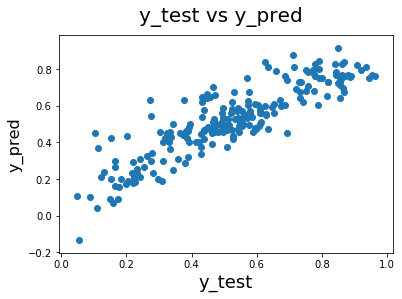

In [85]:
#Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


In [86]:
#Model Evaluation:


In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7729063775388401